In [1]:
import librosa
from IPython.display import Audio
import glob
import os
import matplotlib.pyplot as plt

In [46]:
orig = r"C:\Users\dave\aiffel\EUANGGG\maincode\data\dataset\audioonly\labeled\orig_resample\hungry\hungry (22).wav"
aug = r"C:\Users\dave\Downloads\다운로드 (9).wav"

In [47]:
orig_audio, sr_orig = librosa.load(orig, sr=20000)
aug_audio, sr_aug= librosa.load(aug, sr=None)

In [48]:
len(orig_audio)

138400

In [49]:
len(aug_audio)

120000

In [50]:
mel_spec_orig = librosa.feature.melspectrogram(y=orig_audio, sr=sr_orig)
mel_spec_aug = librosa.feature.melspectrogram(y=aug_audio, sr=sr_aug)

In [51]:
import numpy as np

mel_spec_db_orig = librosa.power_to_db(mel_spec_orig, ref=np.max)
mel_spec_db_aug = librosa.power_to_db(mel_spec_aug, ref=np.max)

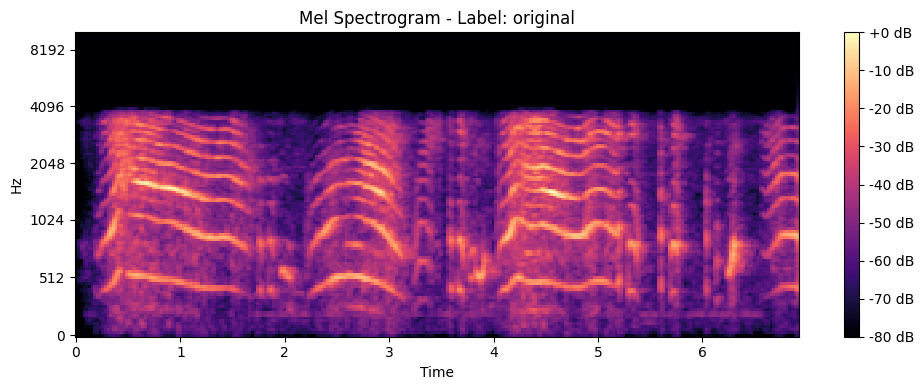

In [52]:
# Plot the Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db_orig, sr=20000, hop_length=512, x_axis='time', y_axis='mel')
# plt.ylim(0, 5000)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram - Label: original')
plt.tight_layout()
plt.show()

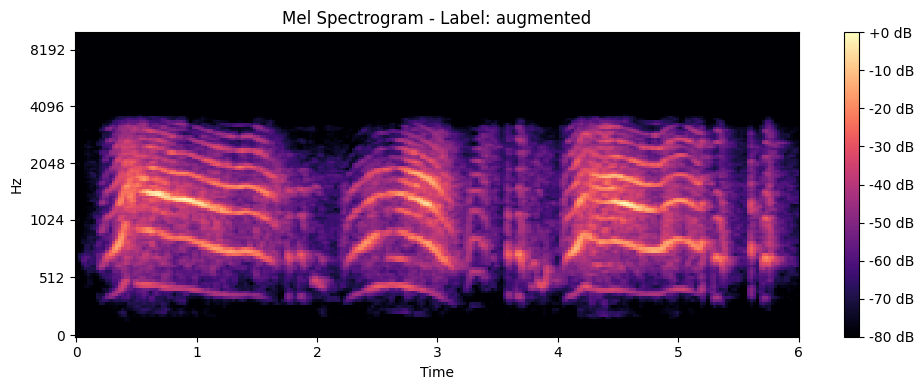

In [53]:
# Plot the Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db_aug, sr=20000, hop_length=512, x_axis='time', y_axis='mel')
# plt.ylim(0, 5000)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram - Label: augmented')
plt.tight_layout()
plt.show()

In [54]:
# import librosa
# import numpy as np

# # Check if the sampling rates are different
# different_sampling_rates = sr_aug != sr_orig

# # Calculate the pitches and magnitudes of the audio files
# pitches_augmented, magnitudes_augmented = librosa.piptrack(y=aug_audio, sr=sr_aug)
# pitches_original, magnitudes_original = librosa.piptrack(y=orig_audio, sr=sr_orig)

# # Extract the index of the maximum magnitude (this is a proxy to pitch since we're not implementing a full pitch detection algorithm here)
# index_augmented = magnitudes_augmented.argmax()
# index_original = magnitudes_original.argmax()

# index_augmented
# # # Corresponding pitches
# # pitch_augmented = pitches_augmented[index_augmented]
# # pitch_original = pitches_original[index_original]

# # # Check if there's a notable difference between the pitches
# # pitch_difference = pitch_augmented - pitch_original

# # # Return the results
# # pitch_difference, different_sampling_rates

In [55]:
# pitches_augmented.shape

In [56]:
# pitches_original.shape

In [57]:
# magnitudes_augmented.shape

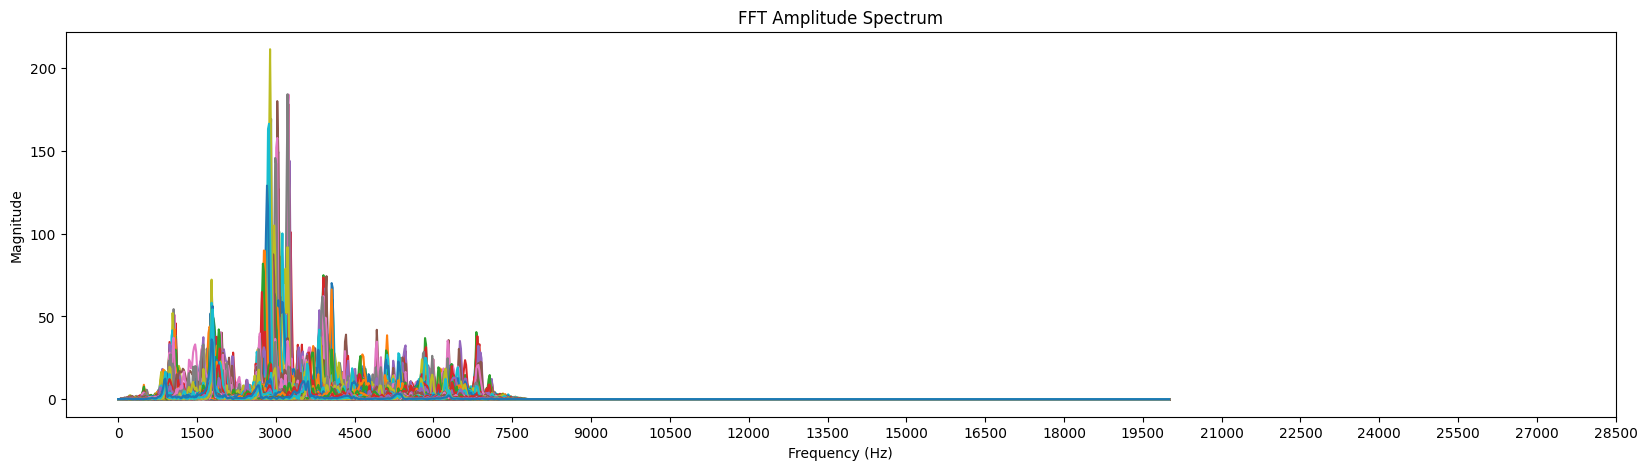

In [58]:
import numpy as np
# Perform the FFT
fft_orig = np.fft.fft(orig_audio)

# Compute the magnitude spectrum
S = np.abs(librosa.stft(orig_audio))

# Create frequency bins
frequency_orig = np.linspace(0, sr_orig, len(S))

# Consider only the first half of the spectrum
# half_index = len(magnitude_orig) // 2
# magnitude_orig = magnitude_orig[:half_index]
# frequency_orig = frequency_orig[:half_index]

# Plot the spectrum
plt.figure(figsize=(20, 5))
plt.plot(frequency_orig, S)
plt.xticks(np.arange(0, 30000, step=1500))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Amplitude Spectrum')
plt.show()

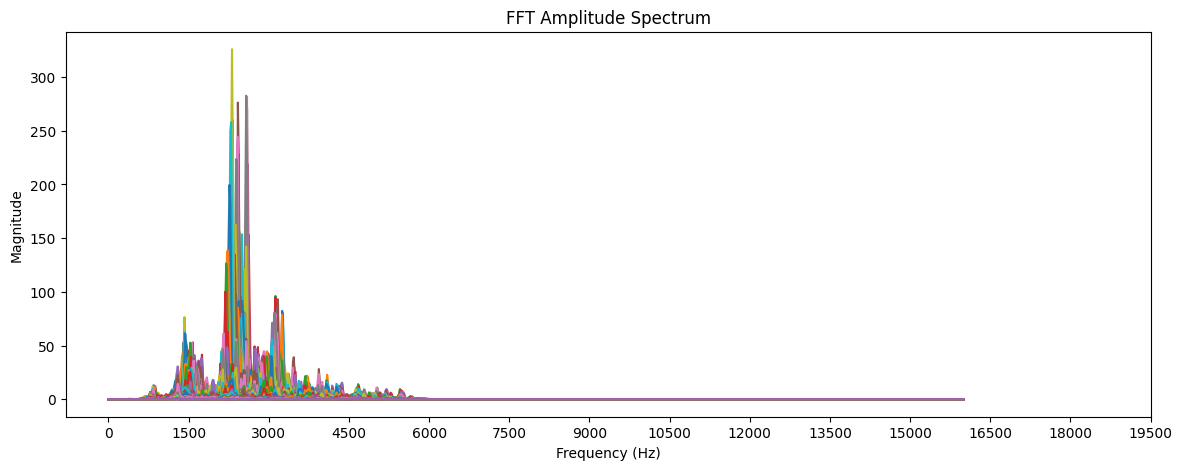

In [59]:
# Perform the FFT
# fft_aug = np.fft.fft(aug_audio)

# Compute the magnitude spectrum
S_aug = np.abs(librosa.stft(aug_audio))
S_aug_flat = S_aug.flatten()

# Create frequency bins
frequency_aug = np.linspace(0, sr_aug, len(S_aug))

# Consider only the first half of the spectrum
# half_index_aug = len(magnitude_aug) // 2
# magnitude_aug = magnitude_aug[:half_index]
# frequency_aug = frequency_aug[:half_index]

# Plot the spectrum
plt.figure(figsize=(14, 5))
plt.plot(frequency_aug, S_aug)
plt.xticks(np.arange(0, 20000, step=1500))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Amplitude Spectrum')
plt.show()